In [1]:
import numpy as np
import matplotlib.pyplot as plt

from pipeline import *

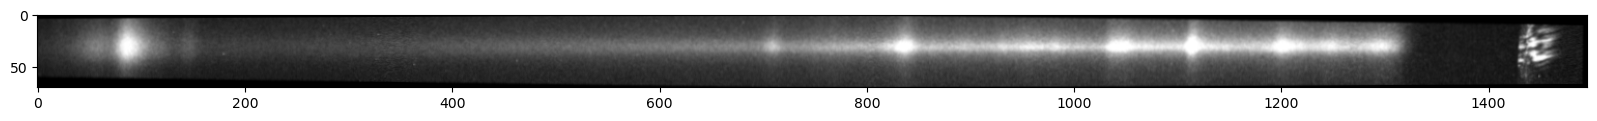

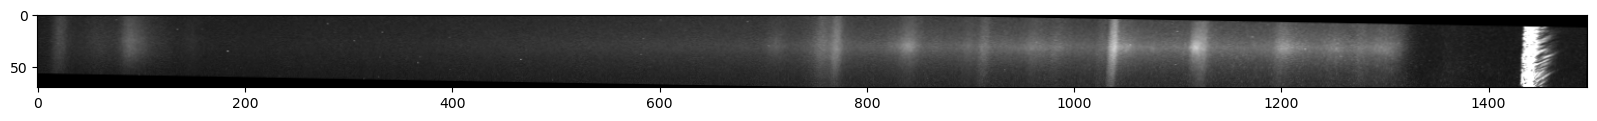

In [2]:
pmma_img = imread_gs('data/pmma_192648.tif')
benzo_img = imread_gs('data/benzoic1000msgain_193519.tif')
show(pmma_img)
show(benzo_img)

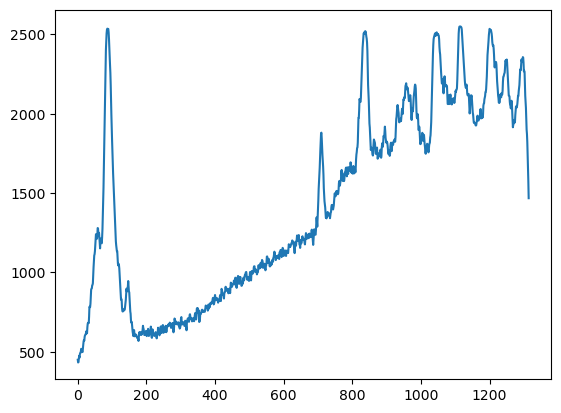

In [3]:
pmma_spec = raw_spectrum(pmma_img)
plt.plot(pmma_spec)

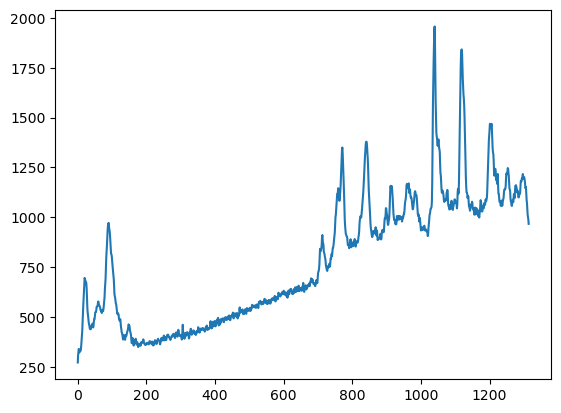

In [4]:
benzo_spec = raw_spectrum(benzo_img)
plt.plot(benzo_spec)

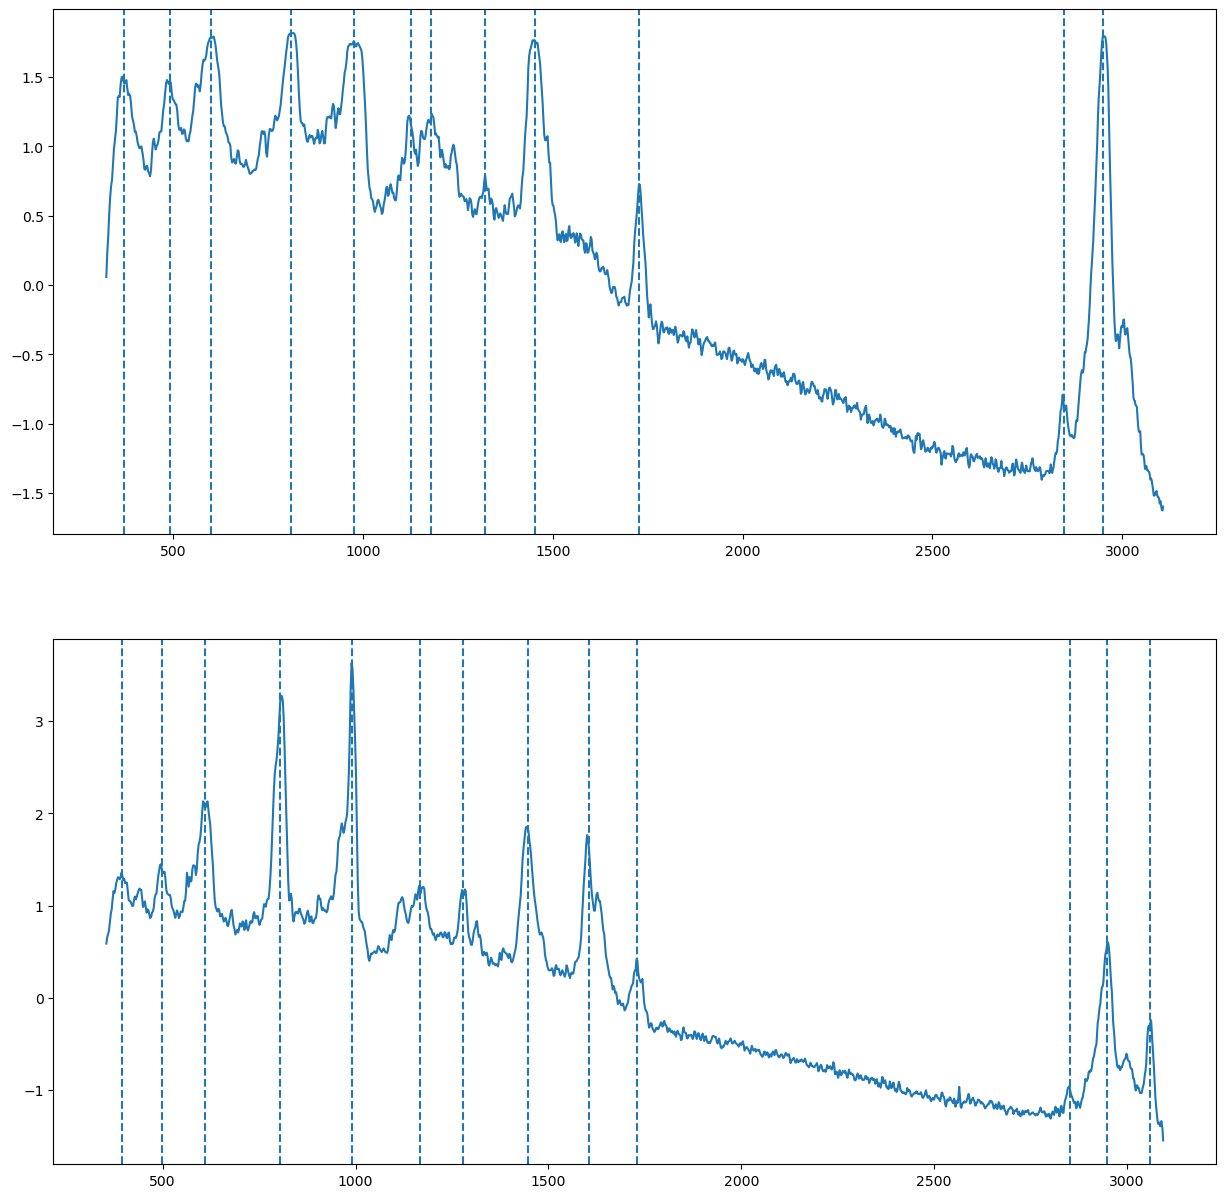

In [5]:
ref_wvn  = [ 812.86, 976.28, 1451.9, 1728.9, 2844.9, 2952 ]
pmma_pn  = [ 1115, 1045, 836, 710, 145, 88 ]
benzo_pn = [ 1120, 1040, 840, 713, 148, 91 ]

pmma_wvn  = np.poly1d(np.polyfit(pmma_pn, ref_wvn, 3))(np.arange(0, len(pmma_spec)))
benzo_wvn = np.poly1d(np.polyfit(benzo_pn, ref_wvn, 3))(np.arange(0, len(benzo_spec)))

pmma_spec  = gnorm(pmma_spec)
benzo_spec = gnorm(benzo_spec)

fig, ax = plt.subplots(2, figsize=(15, 15))

ax[0].plot(pmma_wvn, pmma_spec)
for x in peaks(pmma_spec):
    ax[0].axvline(pmma_wvn[x], ls='--')
    
ax[1].plot(benzo_wvn, benzo_spec)
for x in peaks(benzo_spec):
    ax[1].axvline(benzo_wvn[x], ls='--')

In [6]:
def gaussian_bckg(x, c, a, m, s):
    return c + a * np.exp(-(x-m)**2 / 2 / s**2)

def gaussian_init(wvn, spec):
    return [ np.min(spec), np.max(spec), 0, np.max(wvn) ]

def cubic_bckg(x, a, b, c, d):
    return a * x**3 + b * x**2 + c * x + d
    
def cubic_init():
    return [0.1]*4

/home/noa/Data/radovi/raman/venv/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


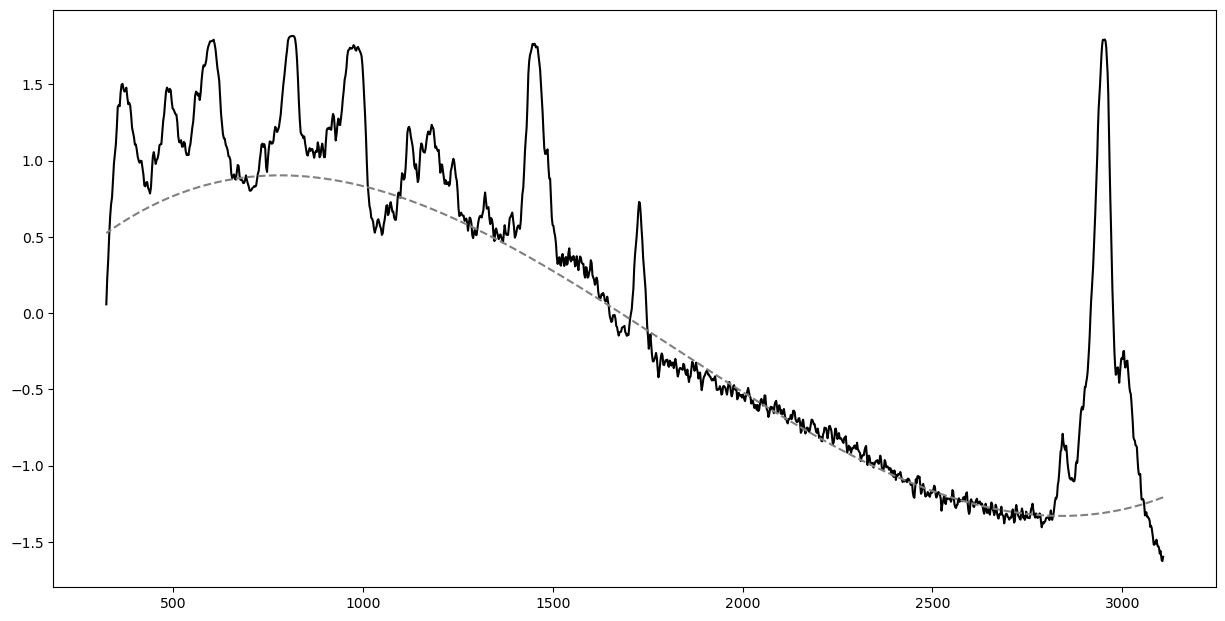

In [7]:
par, cov = get_bckg_fit(pmma_wvn, pmma_spec, cubic_bckg, cubic_init())

plt.figure(figsize=(15, 7.5))
plt.plot(pmma_wvn, pmma_spec, 'k')
plt.plot(pmma_wvn, cubic_bckg(pmma_wvn, *par[:4]), c='gray', ls='--')

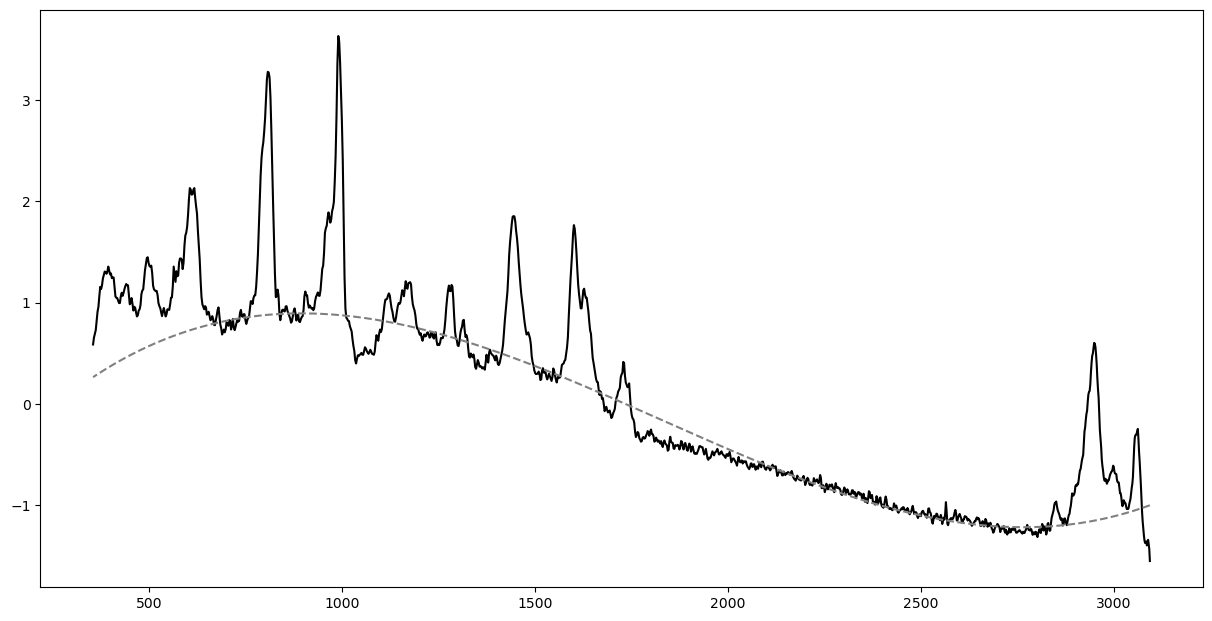

In [8]:
par, cov = get_bckg_fit(benzo_wvn, benzo_spec, cubic_bckg, cubic_init())

plt.figure(figsize=(15, 7.5))
plt.plot(benzo_wvn, benzo_spec, 'k')
plt.plot(benzo_wvn, cubic_bckg(benzo_wvn, *par[:4]), c='gray', ls='--')

In [9]:
from time import time

0.04509425163269043
0.06692743301391602


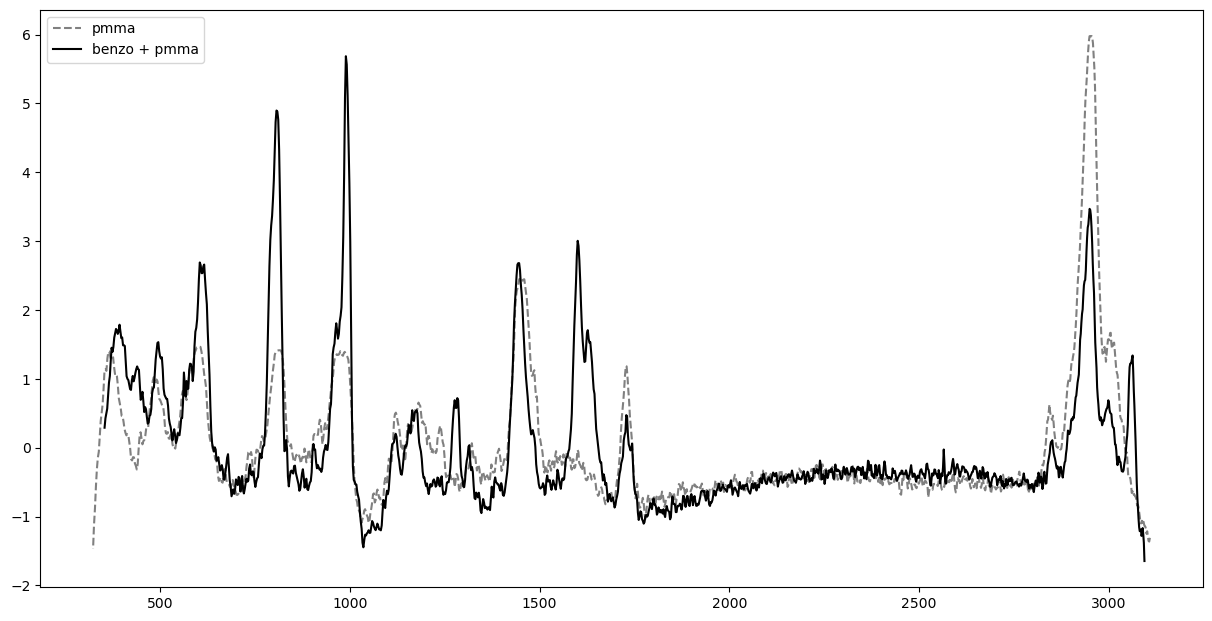

In [10]:
t0 = time()
pmma_nb  = remove_bckg(pmma_wvn, pmma_spec, cubic_bckg, cubic_init())
t1 = time()
benzo_nb = remove_bckg(benzo_wvn, benzo_spec, cubic_bckg, cubic_init())
print(t1 - t0)
print(time() - t1)

plt.figure(figsize=(15, 7.5))
plt.plot(pmma_wvn, pmma_nb, c='gray', ls='--', label='pmma')
plt.plot(benzo_wvn, benzo_nb, c='black', ls='-', label='benzo + pmma')
plt.legend()

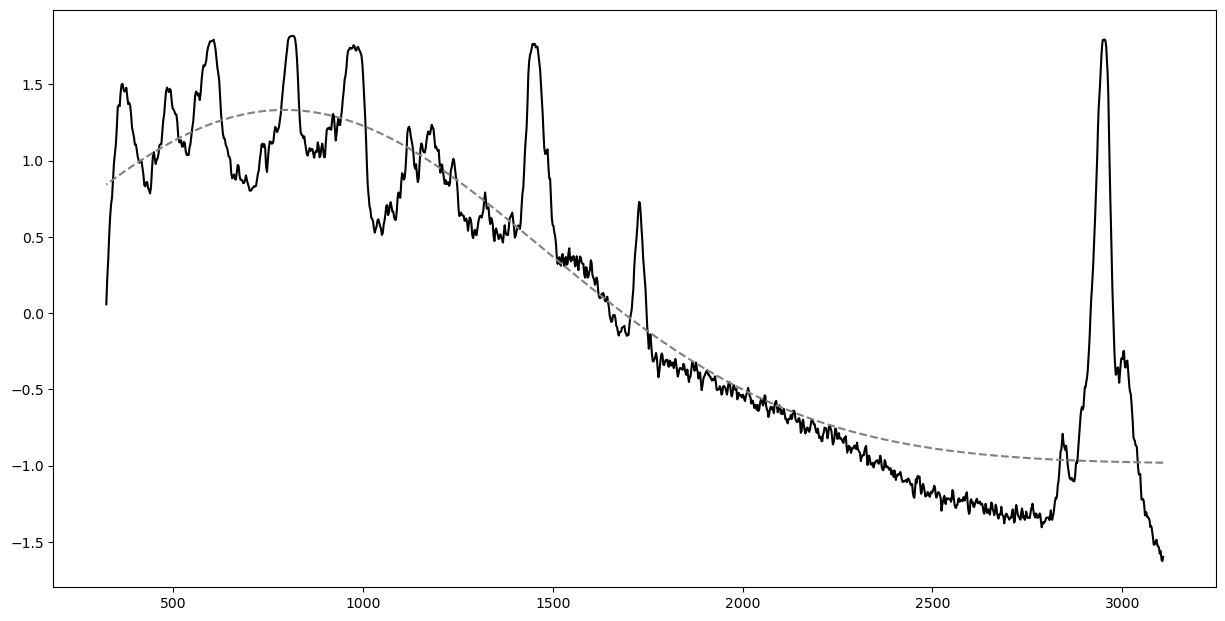

In [11]:
par, cov = get_bckg_fit2(pmma_wvn, pmma_spec, gaussian_bckg, gaussian_init(pmma_wvn, pmma_spec))

plt.figure(figsize=(15, 7.5))
plt.plot(pmma_wvn, pmma_spec, 'k')
plt.plot(pmma_wvn, gaussian_bckg(pmma_wvn, *par[:4]), c='gray', ls='--')

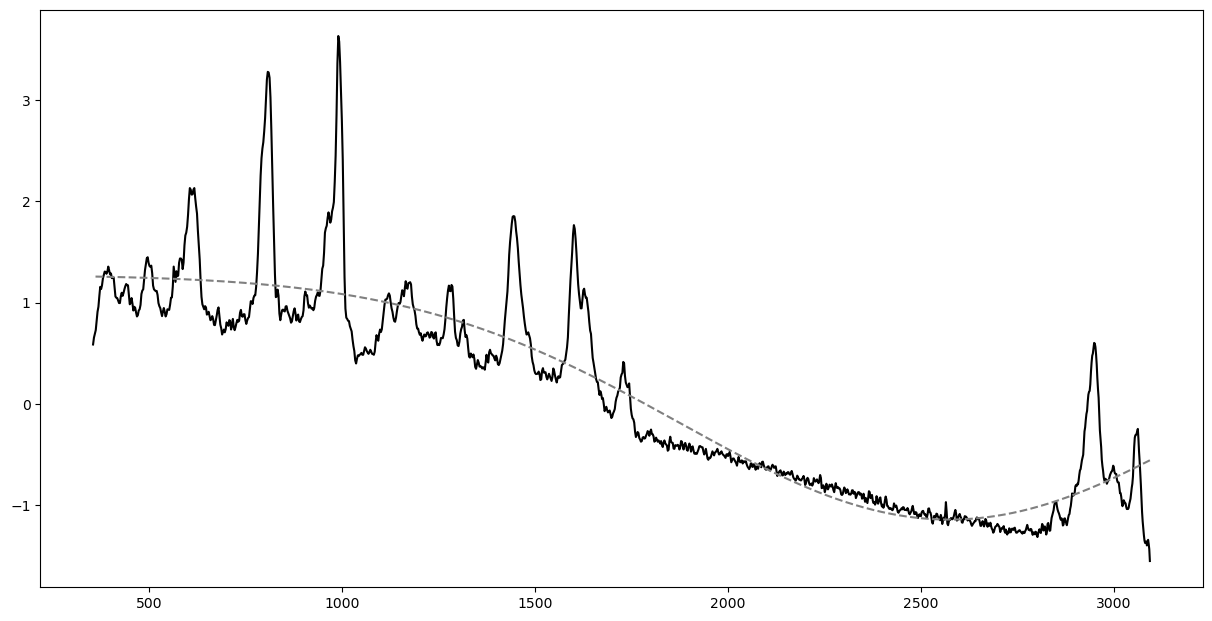

In [12]:
par, cov = get_bckg_fit2(benzo_wvn, benzo_spec, gaussian_bckg, gaussian_init(benzo_wvn, benzo_spec))

plt.figure(figsize=(15, 7.5))
plt.plot(benzo_wvn, benzo_spec, 'k')
plt.plot(benzo_wvn, gaussian_bckg(benzo_wvn, *par[:4]), c='gray', ls='--')

In [13]:
from time import time

0.0015788078308105469
0.0013670921325683594


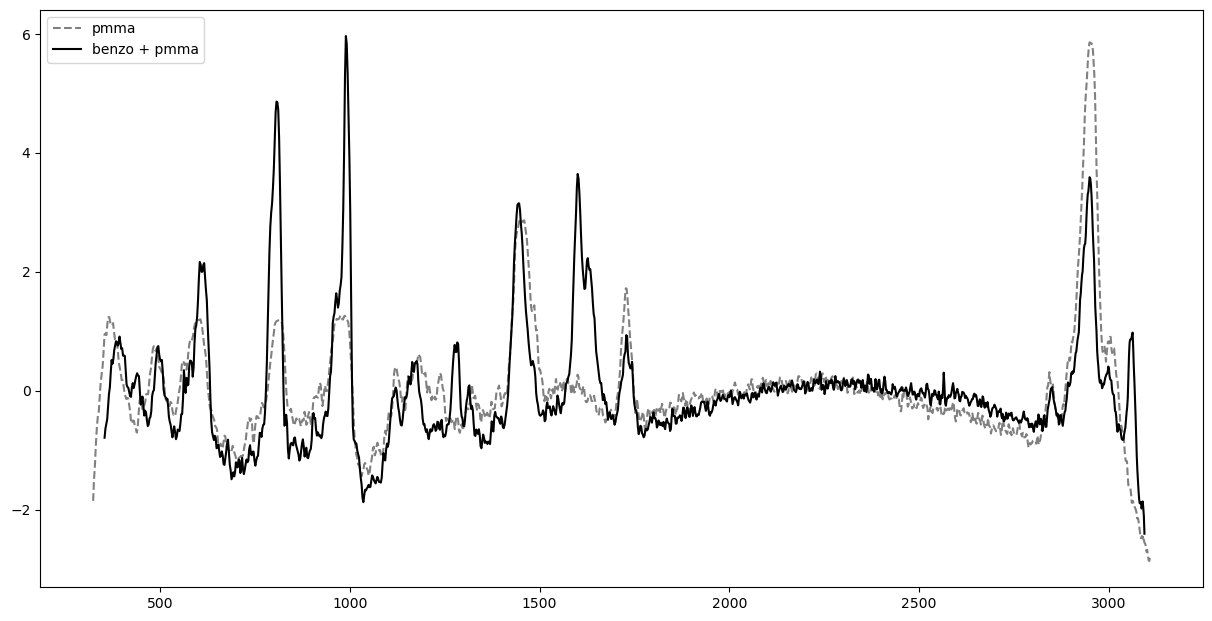

In [16]:
t0 = time()
pmma_nb  = remove_bckg2(pmma_wvn, pmma_spec, cubic_bckg, cubic_init())
t1 = time()
benzo_nb = remove_bckg2(benzo_wvn, benzo_spec, cubic_bckg, cubic_init())
print(t1 - t0)
print(time() - t1)

plt.figure(figsize=(15, 7.5))
plt.plot(pmma_wvn, pmma_nb, c='gray', ls='--', label='pmma')
plt.plot(benzo_wvn, benzo_nb, c='black', ls='-', label='benzo + pmma')
plt.legend()

plt.savefig('/home/noa/Downloads/cubic.png')

0.0034139156341552734
0.006163835525512695


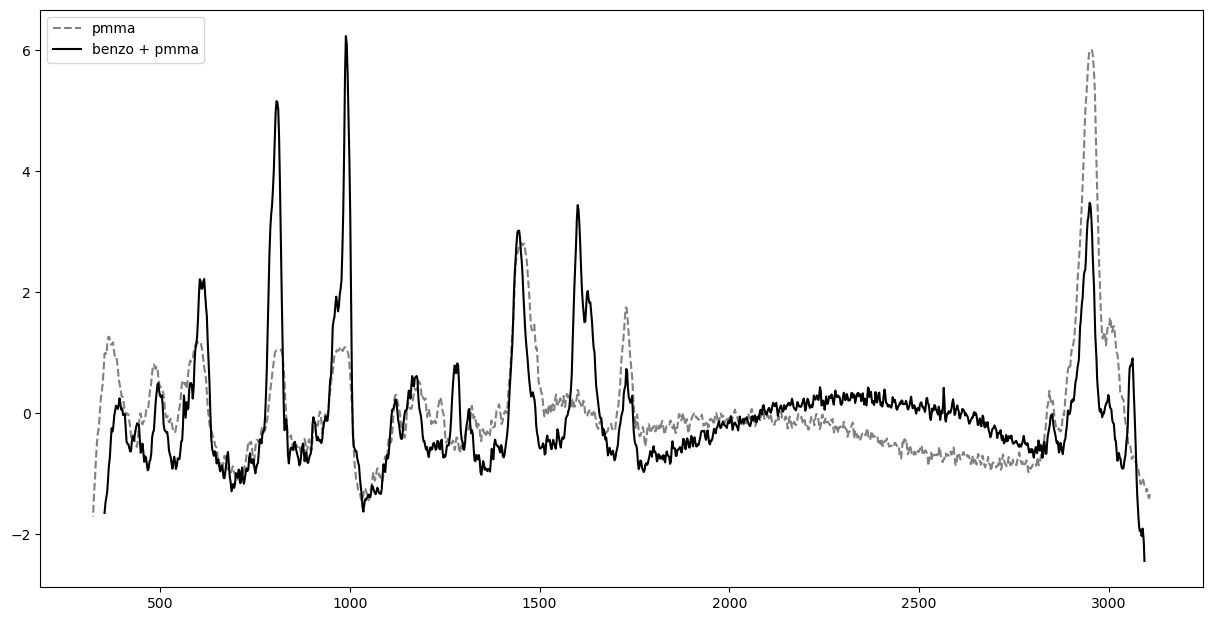

In [18]:
t0 = time()
pmma_nb  = remove_bckg2(pmma_wvn, pmma_spec, gaussian_bckg, gaussian_init(pmma_wvn, pmma_spec))
t1 = time()
benzo_nb = remove_bckg2(benzo_wvn, benzo_spec, gaussian_bckg, gaussian_init(benzo_wvn, benzo_spec))
print(t1 - t0)
print(time() - t1)

plt.figure(figsize=(15, 7.5))
plt.plot(pmma_wvn, pmma_nb, c='gray', ls='--', label='pmma')
plt.plot(benzo_wvn, benzo_nb, c='black', ls='-', label='benzo + pmma')
plt.legend()